# Below we estimate D for the ABCD representation and T(z) for some given z. This generates a scattering matrix S=D that can be used to describe the system. In this notebook we estimate the error in the normality of D.

In [1]:
import Roots
import Potapov
import Time_Delay_Network
import Time_Sims
import functions
import tests

import numpy as np
import numpy.linalg as la
from scipy.linalg import cholesky

import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
Ex = Time_Delay_Network.Example3(r1 = 0.9, r3 = 0.9, max_linewidth=45.)
Ex.run_Potapov()
E = Ex.E
roots = Ex.roots
M1 = Ex.M1
delays = Ex.delays
modes = functions.spatial_modes(roots,M1,E)

In [7]:
def estimate_D(A,B,C,T,z):
    '''
    Estimate the scattering matrix S=D using the ABC matrices
    the transfer function T at a frequency z = i \omega.
    
    Try to satisfy
    T(z) = D + C(zI-A)^{1}B
    
    Args:
        A,B,C (matrices): The A,B, and C matrices of the
        state-space representation
        T (matrix-valued function): The input/output function
        to estimate
        z (complex number): the location at which the scattering
        matrix will be estimated
    Returns:
        The estimated S=D scaterring matrix based on the value of 
        the function T and the ABC matrices.
    '''
    N = np.shape(A)[0]
    return T(z)+C*la.inv(A-z*np.eye(N))*B

In [34]:
def frob_err(D):
    N = np.shape(D)[0]
    err = 0.
    for i in range(N):
        for j in range(N):
            err += abs((D*D.H - D.H*D)[i,j])**2
    return np.sqrt(err)

In [37]:
zs = np.linspace(-200,200)

In [86]:
Dic = {}

In [ ]:
def make_err_plot_D(max_freq):
    if max_freq in Dic:
        Ex = Dic[max_freq]
    else:
        Ex = Time_Delay_Network.Example3(r1 = 0.9, r3 = 0.9, max_linewidth=45.,max_freq=max_freq)
        Dic[max_freq] = Ex
    Ex.run_Potapov()
    E = Ex.E
    roots = Ex.roots
    M1 = Ex.M1
    delays = Ex.delays
    modes = functions.spatial_modes(roots,M1,E)
    A,B,C,D = Potapov.get_Potapov_ABCD(Ex.roots,Ex.vecs)

    Ds = [estimate_D(A,B,C,Ex.T,z*1j) for z in zs]
    plt.plot(zs,[frob_err(D) for D in Ds])
    plt.scatter([root.imag for root in roots],[1e-3]*len(roots),c='r')
    plt.plot(zs,[abs(D[0,1]) for D in Ds])
    
    print D[200]

As long as we expand enough roots, the error in normality remains quite small (blue). The green below is the absolute value of one of a diagonal component that should be zero. We see that near roots this is satisfied, while far away from roots (where the approximation is no longer valid) this is no longer true.

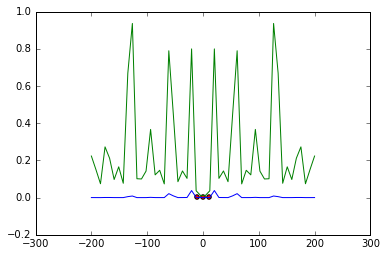

In [78]:
make_err_plot_D(15.)

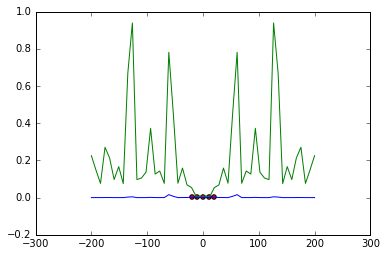

In [79]:
make_err_plot_D(25.)

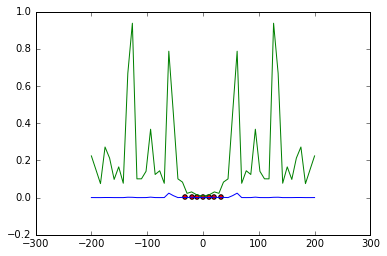

In [80]:
make_err_plot_D(35.)

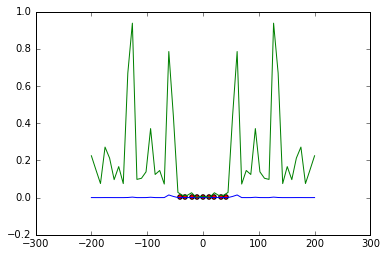

In [81]:
make_err_plot_D(50.)

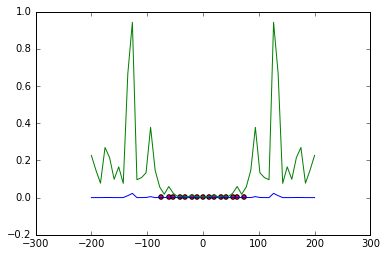

In [82]:
make_err_plot_D(75.)

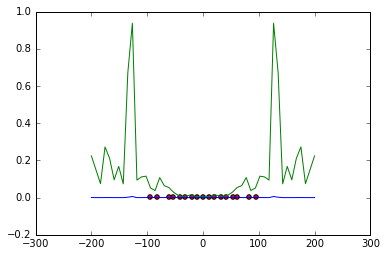

In [89]:
make_err_plot_D(100.)